In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math
%matplotlib inline

# Question 1

In [55]:
def erode(img, k):
    row = img.shape[0]
    col = img.shape[1]
    
    out_img = np.zeros([row,col], dtype=int)
    
    l = int(k/2)
    
    for i in range(l,row-l):
        arr = np.array([])
        for y in range(0,k):
            for x in range(i-l,i+l+1):
                arr = np.append(arr, img[x][y])

        mn = np.min(arr)
                    
        out_img[i][l] = mn
        
        for j in range(l+1,col-l):
            
            idx=0
            
            for x in range(k):
                arr = np.delete(arr,idx)
                
            for x in range(i-l,i+l+1):
                arr = np.append(arr, img[x][j+l])
                
            mn = np.min(arr)
                    
            out_img[i][j] = mn
            
    return out_img

In [56]:
def dilate(img, k):
    row = img.shape[0]
    col = img.shape[1]
    
    out_img = np.zeros([row,col], dtype=int)
    
    l = int(k/2)
    
    for i in range(l,row-l):
        arr = np.array([])
        for y in range(0,k):
            for x in range(i-l,i+l+1):
                arr = np.append(arr, img[x][y])

        mx = np.max(arr)
                    
        out_img[i][l] = mx
        
        for j in range(l+1,col-l):
            
            idx=0
            
            for x in range(k):
                arr = np.delete(arr,idx)
                
            for x in range(i-l,i+l+1):
                arr = np.append(arr, img[x][j+l])
                
            mx = np.max(arr)
                    
            out_img[i][j] = mx
            
    return out_img

In [57]:
def threshold(a,b,k1,k2,img):
    row = img.shape[0]
    col = img.shape[1]
    size = a.shape[0]
    
    img = img/255

    for i in range(row):
        for j in range(col):
            for k in range(size):
                if(img[i][j]>=a[k] and img[i][j]<=b[k]):
                    img[i][j] = k1[k]*img[i][j] + k2[k]
                    break
    img = img*255
    return img

## Part 1

In [67]:
def getAnswers(omr_sheet)->list:
    key1 = omr_sheet[796:1426,221:378]
    key2 = omr_sheet[796:1426,558:715]
    key3 = omr_sheet[796:1426,895:1052]

    row = np.array([0,42,85,127,169,211,254,296,338,381,423,465,507,550,592],dtype = int)
    row_gap = 34

    col = np.array([0,42,84,126],dtype = int)
    col_gap = 29

    k = 0
    val = 50.0
    
    answerKey = np.zeros(45)

    a = np.array([0.0,0.8])
    b = np.array([0.8,1.0])
    k1 = np.array([0.0,0.0])
    k2 = np.array([1.0,0.0])

    for x in range(3):
        if(x==0):
            key = key1
        elif(x==1):
            key = key2
        elif(x==2):
            key = key3

        img = threshold(a,b,k1,k2,key)
        img = img.astype('uint8')
        er = erode(img,7)
        di = dilate(er,13)
        for i in range(15):
            s = []
            for j in range(4):
                ans = di[row[i]:row[i]+row_gap,col[j]:col[j]+col_gap]
                s.append((np.sum(ans)*100)/(255*(row_gap*col_gap)))
            if(s[0] > val):
                answerKey[k] = 1
            elif(s[1] > val):
                answerKey[k] = 2
            elif(s[2] > val):
                answerKey[k] = 3
            elif(s[3] > val):
                answerKey[k] = 4
            k += 1


    out = []
    for i in range(45):
        if(answerKey[i].astype(int) == 1):
            out.append('A')
        elif(answerKey[i].astype(int) == 2):
            out.append('B')
        elif(answerKey[i].astype(int) == 3):
            out.append('C')
        elif(answerKey[i].astype(int) == 4):
            out.append('D')
        elif(answerKey[i].astype(int) == 0):
            out.append(-1)

    return out

In [68]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/imgs/answerKey.jpg',0)

In [69]:
ans_key = getAnswers(img)
print(ans_key)

['B', 'C', 'A', 'A', 'D', 'A', 'C', 'C', 'A', 'C', 'A', 'B', 'C', 'C', 'B', 'A', 'D', 'B', 'C', 'B', 'D', 'C', 'D', 'B', 'D', 'C', 'D', 'D', 'B', 'C', 'B', 'B', 'D', 'C', 'B', 'C', 'B', 'C', 'C', 'A', 'B', 'B', 'C', 'C', 'B']


## Part 2

In [70]:
def studentsAnsKey(omr_sheet)->list:
    key1 = omr_sheet[788:1385,212:371]
    key2 = omr_sheet[788:1385,541:699]
    key3 = omr_sheet[788:1385,870:1028]

    row = np.array([0,41,81,122,162,203,244,285,325,366,406,447,487,528,568],dtype = int)
    row_gap = 28

    col = np.array([0,41,82,123],dtype = int)
    col_gap = 35

    k = 0
    val = 55.0
    
    answerKey = np.zeros(45)

    a = np.array([0.0,0.8])
    b = np.array([0.8,1.0])
    k1 = np.array([0.0,0.0])
    k2 = np.array([1.0,0.0])

    for x in range(3):
        if(x==0):
            key = key1
        elif(x==1):
            key = key2
        elif(x==2):
            key = key3

        img = threshold(a,b,k1,k2,key)
        img = img.astype('uint8')
        er = erode(img,5)
        di = dilate(er,13)
        for i in range(15):
            s = []
            for j in range(4):
                ans = di[row[i]:row[i]+row_gap,col[j]:col[j]+col_gap]
                s.append((np.sum(ans)*100)/(255*(row_gap*col_gap)))
            if(s[0] > val):
                answerKey[k] = 1
            elif(s[1] > val):
                answerKey[k] = 2
            elif(s[2] > val):
                answerKey[k] = 3
            elif(s[3] > val):
                answerKey[k] = 4
            k += 1


    out = []
    for i in range(45):
        if(answerKey[i].astype(int) == 1):
            out.append('A')
        elif(answerKey[i].astype(int) == 2):
            out.append('B')
        elif(answerKey[i].astype(int) == 3):
            out.append('C')
        elif(answerKey[i].astype(int) == 4):
            out.append('D')
        elif(answerKey[i].astype(int) == 0):
            out.append(-1)

    return out

In [71]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/imgs/sampleStudentOMRSheet.png',0)

In [73]:
student_ans = studentsAnsKey(img)
print(student_ans)

['D', 'C', 'B', 'D', 'A', 'A', 'C', 'A', 'A', 'C', 'B', 'D', 'C', 'C', 'C', 'C', 'D', 'B', 'C', 'D', 'D', 'C', 'B', 'B', 'D', 'C', 'D', 'C', 'B', 'B', 'C', 'B', 'D', 'D', 'A', 'D', 'A', 'A', 'A', -1, -1, 'D', -1, 'B', 'D']


In [75]:
marks = 0
for i in range(45):
    if(student_ans[i] != -1 and student_ans[i] == ans_key[i]):
        marks += 4
    elif(student_ans[i] != -1 and student_ans[i] != ans_key[i]):
        marks += -1    

print(marks)

53


# Question 2

In [31]:
def connComponent(pict):
    pict = cv2.copyMakeBorder(pict,1,1,1,1,cv2.BORDER_CONSTANT,0)
    
    row = pict.shape[0]
    col = pict.shape[1]
    
    tag_pict = np.zeros((row,col),dtype = 'uint8')
    
    vis = np.zeros(row*col,dtype = 'int')
    
    tag = 1
    
    for i in range(1,row-1):
        for j in range(1,col-1):
            if(pict[i][j]==255 and vis[i*col+j] == 0):
                stack = []
                stack.append(i*col+j)
                vis[i*col+j] = 1
                while len(stack) != 0:
                    coord = stack.pop(0)
                    p = int(coord/col)
                    q = coord%col
                    tag_pict[p][q] = tag
                    for a in range(-1,2):
                        for b in range(-1,2):
                            if(vis[(p+a)*col + (q+b)] == 0 and pict[p+a][q+b] == 255):
                                stack.append((p+a)*col + (q+b))
                                vis[(p+a)*col + (q+b)] = 1
                tag += 1
    
    return tag_pict

In [46]:
colors = [[0,0,0],
          [35,125,100], [215, 194, 174], [0, 255, 0], [0, 255, 255],
          [237, 184, 121], [254, 123, 57], [105, 189, 210], [105, 189, 210],
          [101, 0, 255], [13, 222, 132], [255, 0, 203], [42, 194, 37],
          [255, 0, 0], [168, 75, 222], [194, 27, 138], [194, 152, 27],
          [27, 194, 191], [215, 194, 174], [0, 255, 0], [0, 0, 255],
          [237, 184, 121], [224, 123, 57], [105, 189, 210], [105, 189, 210],
          [101, 0, 255], [13, 222, 132], [255, 0, 203], [42, 194, 37],
          [255, 0, 0], [178, 75, 222], [194, 27, 138], [194, 172, 27],
          [27, 194, 191], [25, 194, 17], [0, 255, 0], [0, 0, 255],
          [237, 184, 121], [224, 123, 57], [115, 184, 199], [105, 189, 210],
          [101, 26, 255], [13, 222, 132], [255, 0, 203], [42, 194, 37],
          [255, 0, 0], [168, 75, 222], [194, 27, 138], [194, 152, 27],
          [27, 194, 191], [215, 194, 174], [0, 255, 0],[194, 27, 138]
        ]

In [47]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/imgs/pictionary.png',0)

a = np.array([0.0,0.69])
b = np.array([0.69,1.0])
k1 = np.array([0.0,0.0])
k2 = np.array([0.0,1.0])
img = threshold(a,b,k1,k2,img)

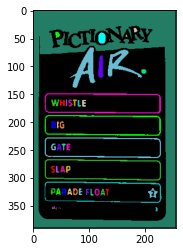

In [48]:
tagged_img = connComponent(img)

row = tagged_img.shape[0]
col = tagged_img.shape[1]

colored_img = np.zeros((row,col,3),dtype='uint8')

for i in range(row):
  for j in range(col):
    colored_img[i][j] = colors[int(tagged_img[i][j])]

plt.imshow(colored_img)

# Question 3

In [49]:
def effMedianFilter(img,k):
    
    row = img.shape[0]
    col = img.shape[1]
    
    out_img = np.zeros([row,col], dtype=int)
    
    l = int(k/2)
    
    for i in range(l,row-l):
        arr = np.array([])
        for y in range(0,k):
            for x in range(i-l,i+l+1):
                arr = np.append(arr, img[x][y])

        med = np.median(arr)
                    
        out_img[i][l] = med
        
        for j in range(l+1,col-l):
            
            idx=0
            
            for x in range(k):
                arr = np.delete(arr,idx)
                
            for x in range(i-l,i+l+1):
                arr = np.append(arr, img[x][j+l])
                
            med = np.median(arr)
                    
            out_img[i][j] = med
            
    return out_img

In [50]:
def ContrastStretching(img,a,b):
    mn = np.min(img)
    mx = np.max(img)
    
    img = img.astype(np.float64)
    
    img = np.round(((img - mn) * (b - a)  / (mx - mn)) + a)
    
    return img.astype(np.uint8)

In [51]:
def histEqualization(img):
    
    row = img.shape[0]
    col = img.shape[1]
    
    prob = np.zeros(256, dtype = int)
    
    for i in range(row):
        for j in range(col):
            prob[img[i][j]] += 1
    
    prob = prob/(row*col)
    
    cumulative_prob = np.zeros(256, dtype = float)
    
    cumulative_prob[0] = prob[0]
    
    for k in range(1,256):
        cumulative_prob[k] = prob[k]+cumulative_prob[k-1]
        
    matching = np.zeros(256, dtype = int)
    
    for k in range(256):
        matching[k] = round(255*cumulative_prob[k-1])
        
    out_img = np.zeros([row,col], dtype = int)
    
    for i in range(row):
        for j in range(col):
            out_img[i][j] = matching[img[i][j]]
            
    return out_img

In [52]:
def vintageEffect(img):
    r = img[:,:,0]
    g = img[:,:,1]
    b = img[:,:,2]
    
    row = img.shape[0]
    col = img.shape[1]
    
    vint_img = np.zeros((row,col,3),dtype = 'uint8')
    vint_img[:,:,0] = 0.293*r + 0.769*g + 0.210*b
    vint_img[:,:,1] = 0.249*r + 0.686*g + 0.188*b
    vint_img[:,:,2] = 0.172*r + 0.534*g + 0.151*b
    
    for i in range(row):
        for j in range(col):
            for k in range(3):
                if vint_img[i][j][k] > 255:
                    vint_img[i][j][k] = 255
    return vint_img

In [75]:
def matrixEffect(img):
    r = img[:,:,0]
    g = img[:,:,1]
    b = img[:,:,2]
    
    r = r/255
    g = g/255
    b = b/255

    row = img.shape[0]
    col = img.shape[1]
   
    matr_img = np.zeros((row,col,3), dtype = 'float64')
    matr_img[:,:,0] = np.power(r,1.5)
    matr_img[:,:,1] = np.power(g,0.8)
    matr_img[:,:,2] = np.power(b,1.5)
    
    matr_img = matr_img*255

    return matr_img.astype('uint8')

In [54]:
def vignetting(img,sigma):
    row = img.shape[0]
    col = img.shape[1]
    
    x_gauss_ker = cv2.getGaussianKernel(col,sigma)
    y_gauss_ker = cv2.getGaussianKernel(row,sigma)
    
    gauss_ker = y_gauss_ker * (x_gauss_ker.T)
    gauss_ker = gauss_ker/np.max(gauss_ker)
    
    if len(img.shape) == 2:
        out_img = img * gauss_ker
        return out_img
    else:
        out_img = np.zeros((row,col,3))
        for i in range(3):
            out_img[:,:,i] = img[:,:,i]*gauss_ker
        
    return out_img.astype('uint8')

In [106]:
def exponential_function(channel, exp):
    table = np.array([min((i**exp), 255) for i in np.arange(0, 256)]).astype('uint8')
    channel = cv2.LUT(channel, table)
    
    return channel

In [94]:
def duoTone(img, num, exp):
    for i in range(3):
        if i == num:
            img[:, :, i] = exponential_function(img[:, :, i], exp)
        else:
            img[:, :, i] = 0
    
    return img.astype('uint8')

## Part 1

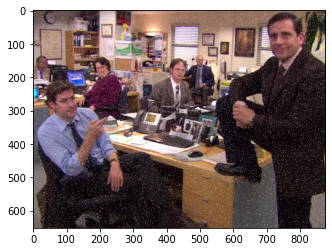

In [55]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/imgs/salt.png')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

plt.imshow(img)

In [56]:
k = 3

img_r = effMedianFilter(img[:,:,0],k)
img_g = effMedianFilter(img[:,:,1],k)
img_b = effMedianFilter(img[:,:,2],k)

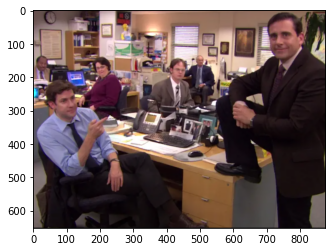

In [57]:
filtered_img = np.dstack((img_r,img_g,img_b))

plt.imshow(filtered_img)

## Part 2

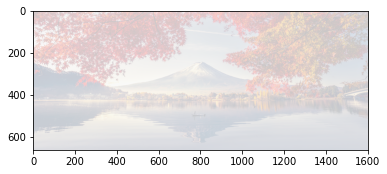

In [72]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/imgs/landscape.png')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

plt.imshow(img)

In [59]:
a = 50
b = 255

img_r = ContrastStretching(img[:,:,0],a,b)
img_g = ContrastStretching(img[:,:,1],a,b)
img_b = ContrastStretching(img[:,:,2],a,b)

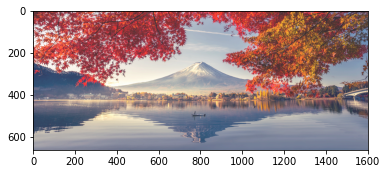

In [60]:
filtered_img = np.dstack((img_r,img_g,img_b))

plt.imshow(filtered_img)

## part 3

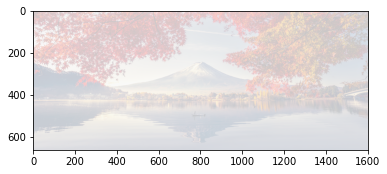

In [61]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/imgs/landscape.png')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

plt.imshow(img)

In [62]:
img_r = histEqualization(img[:,:,0])
img_g = histEqualization(img[:,:,1])
img_b = histEqualization(img[:,:,2])

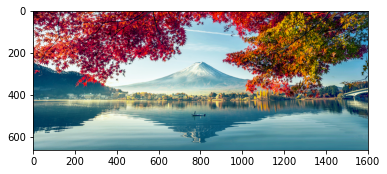

In [63]:
filtered_img = np.dstack((img_r,img_g,img_b))

plt.imshow(filtered_img)

## part 4

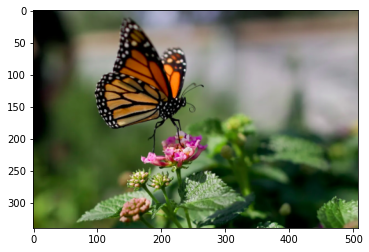

In [113]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/imgs/butterfly.png')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

plt.imshow(img)

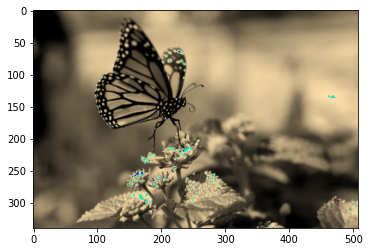

In [69]:
filtered_img = vintageEffect(img)

plt.imshow(filtered_img)

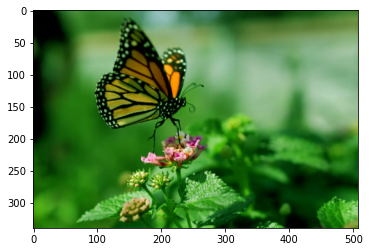

In [76]:
filtered_img = matrixEffect(img)

plt.imshow(filtered_img)

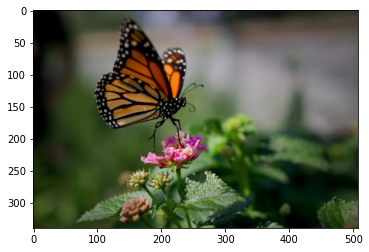

In [78]:
filtered_img = vignetting(img,255)

plt.imshow(filtered_img)

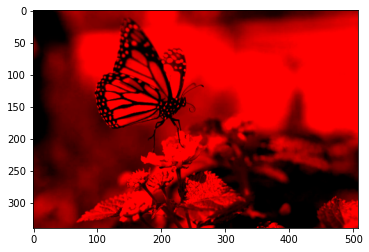

In [109]:
duo_tone_r = duoTone(img,0,1.1)

plt.imshow(duo_tone_r)

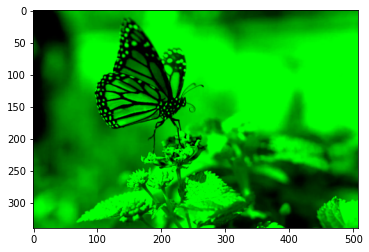

In [111]:
duo_tone_g = duoTone(img,1,1.1)

plt.imshow(duo_tone_g)

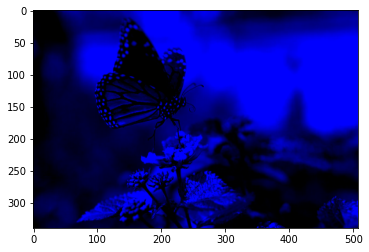

In [114]:
duo_tone_b = duoTone(img,2,1.1)

plt.imshow(duo_tone_b)

# Question 4

## Part 1

In [37]:
def imrotate(img,angle,retainAllPixels):
    if(retainAllPixels == 1):
        deg = math.radians(angle)                             
        cosine = math.cos(deg)
        sine = math.sin(deg)
        
        row = img.shape[0]
        col = img.shape[1]

        row1 = round(abs(row*cosine)+abs(col*sine))+1
        col1 = round(abs(col*cosine)+abs(row*sine))+1
        
        rot_img = np.zeros((row1,col1))
        
        row0 = round((row+1)/2 - 1)   
        col0 = round((col+1)/2 - 1)  
              
        row1_0 = round((row1+1)/2 - 1)   
        col1_0 = round((col1+1)/2 - 1)        
        
        for i in range(row):
            for j in range(col):
                y = row0 - i                  
                x = col0 - j
                
                y_ang = row1_0 - round(y*cosine - x*sine)
                x_ang = col1_0 - round(y*sine + x*cosine)
                
                if y_ang < row1 and x_ang < col1:
                    rot_img[y_ang][x_ang] = img[i][j]
                
        return rot_img.astype('uint8')
    else:
        deg = math.radians(angle)                             
        cosine = math.cos(deg)
        sine = math.sin(deg)
        
        row = img.shape[0]
        col = img.shape[1]

        row1 = round(abs(row*cosine)+abs(col*sine))+1
        col1 = round(abs(col*cosine)+abs(row*sine))+1
        
        rot_img = np.zeros((row,col))
        row0 = round((row+1)/2 - 1)   
        col0 = round((col+1)/2 - 1)   
        
        row1_0 = round((row1+1)/2 - 1)   
        col1_0 = round((col1+1)/2 - 1)        
        
        for i in range(row):
            for j in range(col):
                y = row0 - i                  
                x = col0 - j
                
                y_ang = row0 - round(y*cosine - x*sine)
                x_ang = col0 - round(y*sine + x*cosine)
                
                if y_ang >=0 and x_ang >= 0 and y_ang < row and x_ang < col:
                    rot_img[y_ang][x_ang] = img[i][j]
                
        return rot_img.astype('uint8')

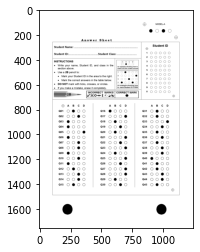

In [22]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/imgs/answerKey.jpg',0)

plt.imshow(img, cmap = 'gray')

### Retaining all pixels

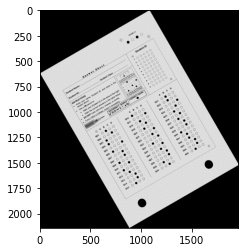

In [23]:
rotated_img = imrotate(img,30,1)

plt.imshow(rotated_img, cmap = 'gray')

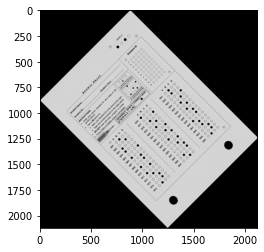

In [24]:
rotated_img = imrotate(img,45,1)

plt.imshow(rotated_img, cmap = 'gray')

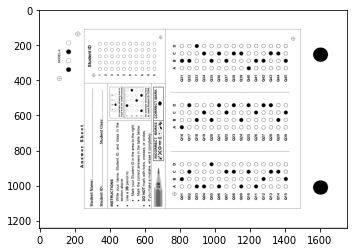

In [25]:
rotated_img = imrotate(img,90,1)

plt.imshow(rotated_img, cmap = 'gray')

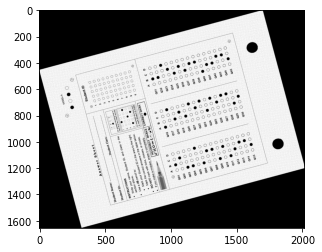

In [26]:
rotated_img = imrotate(img,105,1)

plt.imshow(rotated_img, cmap = 'gray')

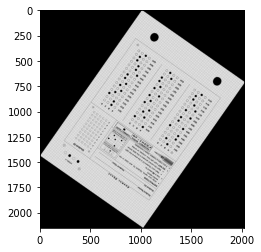

In [27]:
rotated_img = imrotate(img,145,1)

plt.imshow(rotated_img, cmap = 'gray')

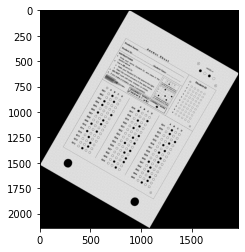

In [28]:
rotated_img = imrotate(img,-30,1)

plt.imshow(rotated_img, cmap = 'gray')

### Not Retaining Pixels

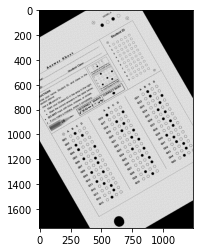

In [29]:
rotated_img = imrotate(img,30,0)

plt.imshow(rotated_img, cmap = 'gray')

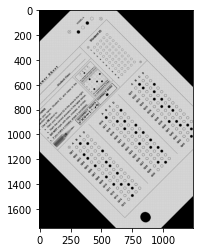

In [30]:
rotated_img = imrotate(img,45,0)

plt.imshow(rotated_img, cmap = 'gray')

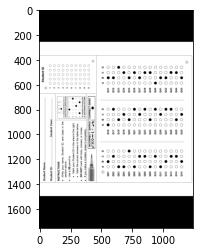

In [31]:
rotated_img = imrotate(img,90,0)

plt.imshow(rotated_img, cmap = 'gray')

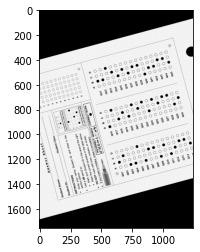

In [32]:
rotated_img = imrotate(img,105,0)

plt.imshow(rotated_img, cmap = 'gray')

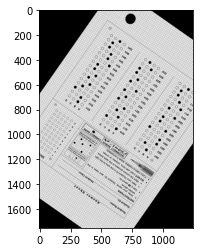

In [33]:
rotated_img = imrotate(img,145,0)

plt.imshow(rotated_img, cmap = 'gray')

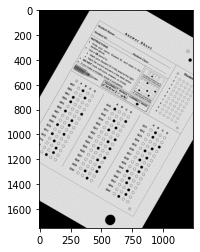

In [34]:
rotated_img = imrotate(img,-30,0)

plt.imshow(rotated_img, cmap = 'gray')

## Part 2

No, simple edge detection will not work in this scenario since the edge detection filter recognises all types of edges, whether circular or in any arbitrary shape, but we just need to identify straight lines, therefore simple edge detection will fail.

# Question 5

In [94]:
def connComponent(pict):
    pict = cv2.copyMakeBorder(pict,1,1,1,1,cv2.BORDER_CONSTANT,0)
    
    row = pict.shape[0]
    col = pict.shape[1]
    
    tag_pict = np.zeros((row,col),dtype = 'uint8')
    
    vis = np.zeros(row*col,dtype = 'int')
    
    tag = 1
    
    for i in range(1,row-1):
        for j in range(1,col-1):
            if(pict[i][j]==255 and vis[i*col+j] == 0):
                stack = []
                stack.append(i*col+j)
                vis[i*col+j] = 1
                while len(stack) != 0:
                    coord = stack.pop(0)
                    p = int(coord/col)
                    q = coord%col
                    tag_pict[p][q] = tag
                    for a in range(-1,2):
                        for b in range(-1,2):
                            if(vis[(p+a)*col + (q+b)] == 0 and pict[p+a][q+b] == 255):
                                stack.append((p+a)*col + (q+b))
                                vis[(p+a)*col + (q+b)] = 1
                tag += 1
    
    return tag_pict

In [90]:
def componentExtraction(tag_img,tag):
    out_img = np.zeros(tag_img.shape,dtype = 'uint8')
    
    l = len(tag)

    for k in range(l):
        for i in range(tag_img.shape[0]):
            for j in range(tag_img.shape[1]):
                if (tag_img[i][j] == tag[k]):
                    out_img[i][j] = 255
    return out_img

In [91]:
def holeExtraction(img):
    tag_img = connComponent(img)
    tag_holes = []

    k = int(np.max(tag_img))

    for i in range(1,k+1):
        tag = []
        tag.append(i)
        
        img = componentExtraction(tag_img,tag)
        
        di = dilate(img,7)
        er = erode(di,7)
        res = er - img
        
        if(np.sum(res) > 0):
            tag_holes.append(i)
    
    out_img = componentExtraction(tag_img,tag_holes)
    
    return tag_holes, out_img

In [96]:
def squareExtraction(img):
    struct_ele = np.array([[0,0,0,0,0],[0,0,0,0,0],[0,0,255,255,255],[0,0,255,255,255],[0,0,255,255,255]],dtype = 'uint8')
    
    row = img.shape[0]
    col = img.shape[1]
    
    for i in range(2,row-2):
        for j in range(2,col-2):
            arr = img[i-2:i+3,j-2:j+3]
            if(np.array_equal(arr,struct_ele)):
                return 1
    return 0

In [103]:
def circleExtraction(img):
    tag_img = connComponent(img)
    tag_sq = []

    k = int(np.max(tag_img))

    for i in range(1,k+1):
        tag = []
        tag.append(i)
        img = componentExtraction(tag_img,tag)
        if(squareExtraction(img) == 1):
            tag_sq.append(i)
    
    circle_tag = []
    for i in range(1,k+1):
        if(tag_sq.count(i) == 0):
            circle_tag.append(i)
    
    out_img = componentExtraction(tag_img,circle_tag)
    
    return circle_tag, out_img

In [125]:
def rectWithoutHole(img):
    tag_img = connComponent(img)
    tag_holes = []
    
    k = int(np.max(tag_img))

    for i in range(1,k+1):
        tag = []
        tag.append(i)
        
        temp = componentExtraction(tag_img,tag)
        
        di = dilate(temp,5)
        di = dilate(di,5)
        er = erode(di,5)
        er = erode(er,5)
        res = er - temp
        
        if(np.sum(res) == 0):
            tag_holes.append(i)
    
    out_img = componentExtraction(tag_img,tag_holes)
    plt.imshow(out_img,cmap = 'gray')
    return tag_holes

In [126]:
def rectWithoutHoleExtraction(img):
    tag_img = connComponent(img)
    tag_sq = []
    
    k = int(np.max(tag_img))

    for i in range(1,k+1):
        tag = []
        tag.append(i)
        
        temp = componentExtraction(tag_img,tag)
        
        if(squareExtraction(temp) == 1):
            tag_sq.append(i)
    
    temp_img = componentExtraction(tag_img,tag_sq)
    
    tag_without_holes = rectWithoutHole(temp_img)
    
    return tag_without_holes

In [112]:
def border(img):
    pad_img = cv2.copyMakeBorder(img,1,1,1,1,cv2.BORDER_CONSTANT,value = 255)
    
    tag_img = connComponent(pad_img)
    
    row = img.shape[0]
    col = img.shape[1]

    ans = np.zeros((row,col),dtype = 'uint8')

    for i in range(row):
        for j in range(col):
            if(tag_img[i][j] == 1):
                ans[i][j] = 255
    
    return ans

In [115]:
def nonoverlapping(img):
    tag_img = connComponent(img)
    
    count_tag = np.zeros(130,dtype = int)
    
    row = img.shape[0]
    col = img.shape[1]

    for i in range(1,130):
        count_tag[i] = np.count_nonzero(tag_img == i)
    
    ans = np.zeros((row,col),dtype = int)
    
    for i in range(row):
        for j in range(col):
            if (count_tag[int(tag_img[i][j])] < 395 and count_tag[int(tag_img[i][j])] > 0):
                ans[i][j] = 255
    
    return ans

In [116]:
def overlapping(img):
    tag_img = connComponent(img)
    
    count_tag = np.zeros(130,dtype = int)
    
    row = img.shape[0]
    col = img.shape[1]

    for i in range(1,130):
        count_tag[i] = np.count_nonzero(tag_img == i)
    
    ans = np.zeros((row,col),dtype = int)
    
    for i in range(row):
        for j in range(col):
            if (count_tag[int(tag_img[i][j])] > 395):
                ans[i][j] = 255
    
    return ans

## Part 1

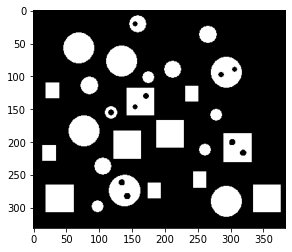

In [92]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/imgs/shapes.png',0)

plt.imshow(img, cmap = 'gray')

In [ ]:
hole_tag, hole_img = holeExtraction(img)

6


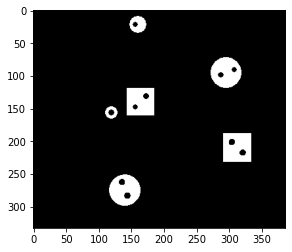

In [99]:
print(len(hole_tag))
plt.imshow(hole_img, cmap = 'gray')

16


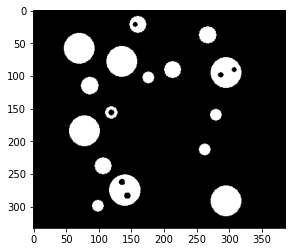

In [98]:
circle_tag, circle_img = circleExtraction(img)

print(len(circle_tag))
plt.imshow(circle_img, cmap = 'gray')

In [128]:
rect_tag, rect_img = rectWithoutHoleExtraction(img)

print(len(rect_tag))

0


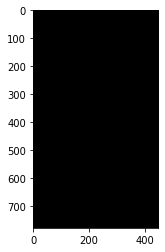

In [129]:
plt.imshow(rect_img, cmap = 'gray')

4


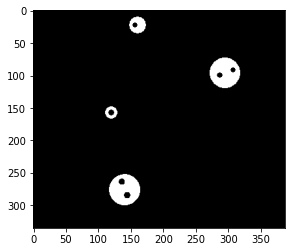

In [107]:
circle_without_hole_tag, circle_without_hole_img = holeExtraction(circle_img)

print(len(circle_without_hole_tag))
plt.imshow(circle_without_hole_img, cmap = 'gray')

## part 2

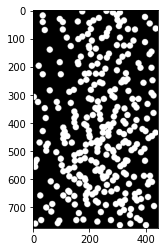

In [108]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/imgs/circles.jpg',0)

plt.imshow(img, cmap = 'gray')


In [109]:
a = np.array([0.0,0.5])
b = np.array([0.5,1.0])
k1 = np.array([0.0,0.0])
k2 = np.array([0.0,1.0])

img = threshold(a,b,k1,k2,img)

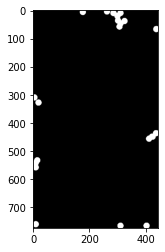

In [114]:
res = border(img)

plt.imshow(res, cmap='gray')

In [117]:
nonoverlapping_img = nonoverlapping(img)

overlapping_img = overlapping(img)

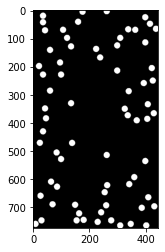

In [119]:
plt.imshow(nonoverlapping_img, cmap = 'gray')

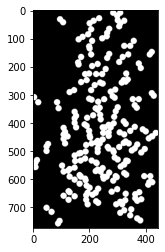

In [124]:
plt.imshow(overlapping_img, cmap = 'gray')